In [121]:
import pandas as pd

In [122]:
# Load pickled dataframe
month_list = ["01-Jan", "02-Feb", "03-Mar", "04-Apr", "05-May", "06-Jun", "07-Jul", "08-Aug", "09-Sep", "10-Oct", "11-Nov", "12-Dec"]
month_number = 1

df_clean = pd.read_pickle("data/pickle-data/"+month_list[month_number-1]+"-df.pkl")
data = df_clean
print(list(data.columns))

# Get all the English tweets
data_en = data

['Unnamed: 0', 'date', 'language', 'likes', 'retweets', 'screen_name', 'tweet', 'tweet_id']


In [123]:
data_en = data_en.drop(['date','likes', 'retweets', 'tweet_id', 'screen_name', 'Unnamed: 0'], axis=1)
data_en.head(20)

,language,tweet
0,und,🤣😭😭
1,en,Anyone know if there is a specific word for SA...
2,und,
3,und,
4,en,Today at King Dinizulu Hospital welcoming the ...
5,und,
6,ar,#فكرة ..\n#استخدمها بدلا من الزمور ❤️\n\nحط ال...
7,en,What’s a good food spot?
8,en,Lmaoo damn what a way to start the new year
9,en,Thank you man! so glad we get to live another ...


In [124]:
from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_en['polarity'] = data_en['tweet'].apply(pol)
data_en['subjectivity'] = data_en['tweet'].apply(sub)

In [125]:
data_en.head(10)

,language,tweet,polarity,subjectivity
0,und,🤣😭😭,0.000000,0.000000
1,en,Anyone know if there is a specific word for SA...,0.000000,0.125000
2,und,,0.000000,0.000000
3,und,,0.000000,0.000000
4,en,Today at King Dinizulu Hospital welcoming the ...,0.136364,0.454545
5,und,,0.000000,0.000000
6,ar,#فكرة ..\n#استخدمها بدلا من الزمور ❤️\n\nحط ال...,0.000000,0.000000
7,en,What’s a good food spot?,0.700000,0.600000
8,en,Lmaoo damn what a way to start the new year,0.136364,0.454545
9,en,Thank you man! so glad we get to live another ...,0.335227,0.750000


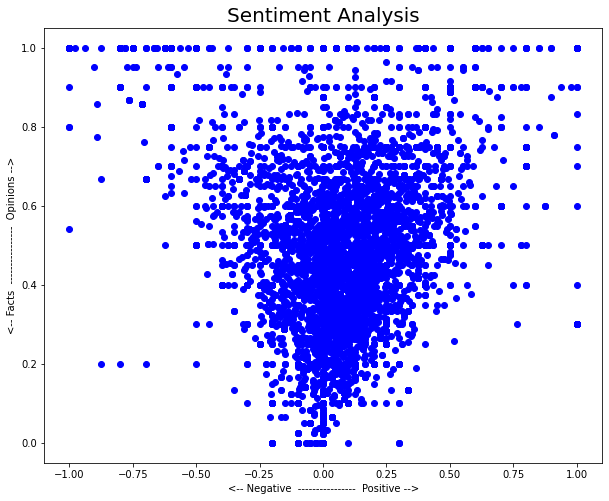

In [126]:
# Scatter plot for sentiment analysis

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

x = data_en.polarity
y = data_en.subjectivity
plt.scatter(x, y, color='blue')
# plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative  ----------------  Positive -->', fontsize=10)
plt.ylabel('<-- Facts  ----------------  Opinions -->', fontsize=10)
plt.savefig("img/sa-"+month_list[month_number-1][3:]+".png", format="png", dpi=200)
plt.show()


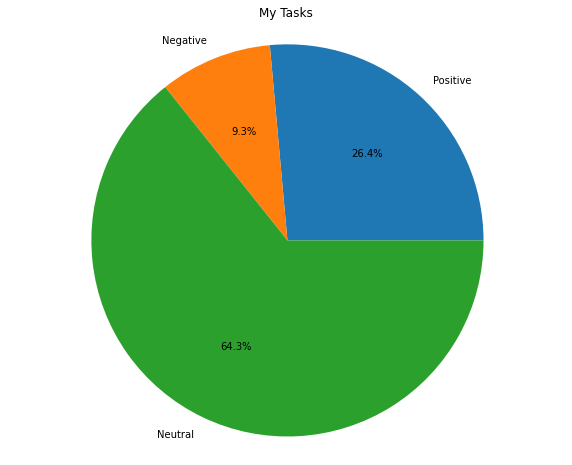

In [127]:
# Plot a pie-chart

pos = data_en[data_en['polarity'] > 0].shape[0]
neg = data_en[data_en['polarity'] < 0].shape[0]
neut = data_en[data_en['polarity'] == 0].shape[0]

Tasks = [pos, neg, neut]

my_labels = 'Positive','Negative','Neutral'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('My Tasks')
plt.axis('equal')
plt.savefig("img/pie-"+month_list[month_number-1]+".png", format="png", dpi=200)
plt.show()